In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import MonthEnd
from numerize.numerize import numerize
import streamlit as st

In [5]:
import pandas as pd

destino_concluido = r"C:\Users\pcp\OneDrive\#jeff\Dev\Analise_Producao\dados\relatorio_intranet_concluido.csv"
destino_pendente = r"C:\Users\pcp\OneDrive\#jeff\Dev\Analise_Producao\dados\relatorio_intranet_pendente.csv"
destino_prod_forno = r"C:\Users\pcp\OneDrive\#jeff\Dev\Analise_Producao\dados\relatorio_forno.csv"


In [6]:
df_concluido = pd.read_csv(destino_concluido)

df_concluido['Conclusão'] = pd.to_datetime(df_concluido['Conclusão'], errors='coerce')
df_concluido['Entrada'] = pd.to_datetime(df_concluido['Entrada'], errors='coerce')

df_pendente = pd.read_csv(destino_pendente)
df_pendente['Conclusão'] = pd.to_datetime(df_pendente['Conclusão'], errors='coerce')
df_pendente['Entrada'] = pd.to_datetime(df_pendente['Entrada'], errors='coerce')

df_forno = pd.read_csv(destino_prod_forno)
df_forno['Data'] = pd.to_datetime(df_forno['Data'], errors='coerce')
df_forno['data2'] = pd.to_datetime(df_forno['data2'], errors='coerce')


In [ ]:
df_resumo_forno = df_forno.groupby('data2')['Área (m2)'].sum().reset_index()
df_resumo_forno.rename(columns={'data2': 'Data', 'Área (m2)':'Área'}, inplace=True)

df_resumo_concluido = df_concluido.groupby('Entrada')['Pedido Área'].sum().reset_index()
df_resumo_concluido.rename(columns={'Entrada': 'Data', 'Pedido Área':'Área'}, inplace=True)

df_resumo_pendente = df_pendente.groupby('Entrada')['Pedido Área'].sum().reset_index()
df_resumo_pendente.rename(columns={'Entrada': 'Data', 'Pedido Área':'Área'}, inplace=True)



df_resumo_total01 = pd.merge(df_resumo_concluido, df_resumo_pendente, on='Data', how='outer')
df_resumo_total01.fillna(0, inplace=True)

df_resumo_total02 = pd.merge(df_resumo_total01, df_resumo_forno, on='Data', how='outer')
df_resumo_total02.fillna(0, inplace=True)

df_resumo_total02.rename(columns={'Área_x': 'Pedidos concluidos', 'Área_y':'Pedidos_pendentes', 'Área':'Forno'}, inplace=True)
df_resumo_total02['Total Pedidos'] = df_resumo_total02['Pedidos concluidos'] + df_resumo_total02['Pedidos_pendentes']

df_resumo_total02

,Data,Pedidos concluidos,Pedidos_pendentes,Forno,Total Pedidos
0,2025-01-02,118.45,0.00,0.00,118.45
1,2025-01-03,277.52,0.00,0.00,277.52
2,2025-01-06,903.08,0.00,653.87,903.08
3,2025-01-07,929.60,0.00,765.50,929.60
4,2025-01-08,982.51,0.00,416.88,982.51
...,...,...,...,...,...
64,2025-03-15,0.00,8.67,362.88,8.67
65,2025-03-16,0.00,2.08,0.00,2.08
66,2025-03-17,15.86,702.61,218.11,718.47
67,2025-03-18,0.00,588.18,956.72,588.18


In [17]:
df_resumo_total02['dia'] = df_resumo_total02['Data'].dt.day
df_resumo_total02['mes'] = df_resumo_total02['Data'].dt.month
df_resumo_total02['ano'] = df_resumo_total02['Data'].dt.year

df_resumo_total02.head()


,Data,Pedidos concluidos,Pedidos_pendentes,Forno,Total Pedidos,dia,mes,ano
0,2025-01-02,118.45,0.0,0.00,118.45,2,1,2025
1,2025-01-03,277.52,0.0,0.00,277.52,3,1,2025
2,2025-01-06,903.08,0.0,653.87,903.08,6,1,2025
3,2025-01-07,929.60,0.0,765.50,929.60,7,1,2025
4,2025-01-08,982.51,0.0,416.88,982.51,8,1,2025


<Figure size 1900x600 with 0 Axes>

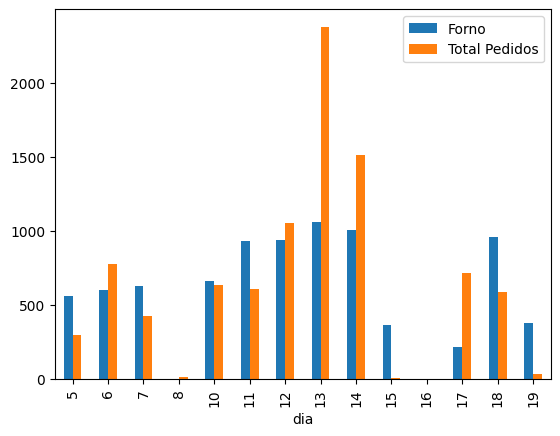

In [ ]:

df_filtro = df_resumo_total02[(df_resumo_total02['mes'] == 3) & (df_resumo_total02['ano']== 2025)]

df_filtro.plot(x='dia', y=['Forno', 'Total Pedidos'], kind='bar')

plt.show()
